In [1]:
import pandas as pd

import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = (10, 6)
sb.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [3]:
address = 'gas_prices.csv'
gas = pd.read_csv(address, encoding = 'utf-8')
gas.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


In [4]:
gas.shape

(19, 11)

In [5]:
gas.describe()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
count,19.000000,18.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,1999.000000,2.348889,2.086842,4.407895,4.224737,4.645789,3.820526,1.781579,3.835789,4.392632,1.592105
std,5.627314,0.845931,0.786618,1.167531,1.425749,1.146610,0.696615,0.462148,1.226170,1.455170,0.663355
min,1990.000000,1.630000,1.380000,3.410000,2.650000,3.570000,2.820000,1.000000,2.050000,2.820000,1.060000
25%,1994.500000,1.780000,1.590000,3.605000,3.370000,3.805000,3.270000,1.475000,2.910000,3.135000,1.145000
50%,1999.000000,1.955000,1.730000,3.870000,3.530000,4.390000,3.640000,1.790000,3.760000,4.130000,1.230000
75%,2003.500000,2.587500,2.180000,4.700000,4.915000,4.940000,4.320000,2.210000,4.345000,5.130000,1.735000
max,2008.000000,4.450000,4.080000,7.510000,7.750000,7.630000,5.740000,2.450000,6.210000,7.420000,3.270000


In [6]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
Year           19 non-null int64
Australia      18 non-null float64
Canada         19 non-null float64
France         19 non-null float64
Germany        19 non-null float64
Italy          19 non-null float64
Japan          19 non-null float64
Mexico         19 non-null float64
South Korea    19 non-null float64
UK             19 non-null float64
USA            19 non-null float64
dtypes: float64(10), int64(1)
memory usage: 1.7 KB


###### Way to plot multiple specific values

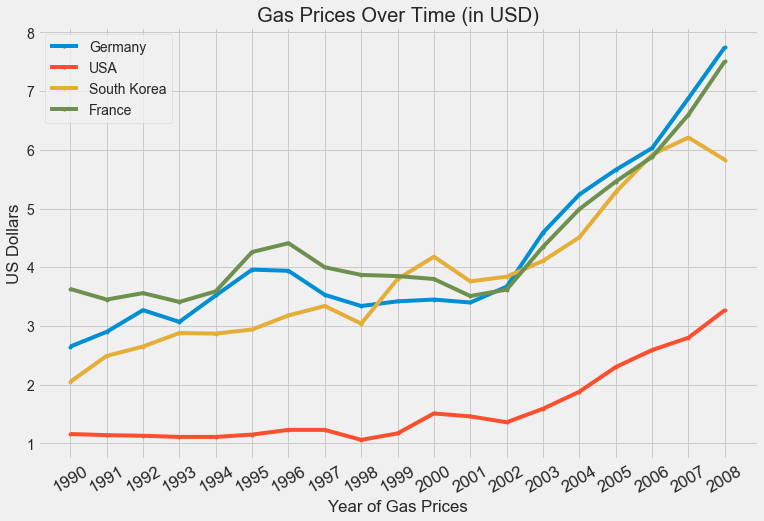

In [7]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

ax.set_title('Gas Prices Over Time (in USD)')
ax.set_xlabel('Year of Gas Prices')
ax.set_ylabel('US Dollars')

ax.plot(gas.Year, gas.Germany, '.-', label = 'Germany')
ax.plot(gas.Year, gas.USA, '.-', label = 'USA')
ax.plot(gas.Year, gas['South Korea'], '.-', label = 'South Korea')
ax.plot(gas['Year'], gas['France'], '.-', label = 'France')

ax.set_xticks(gas.Year)
ax.set_xticklabels(gas.Year, rotation = 30, fontsize = 'large')
ax.legend(loc = 'best')
plt.show()


Prices for All countries

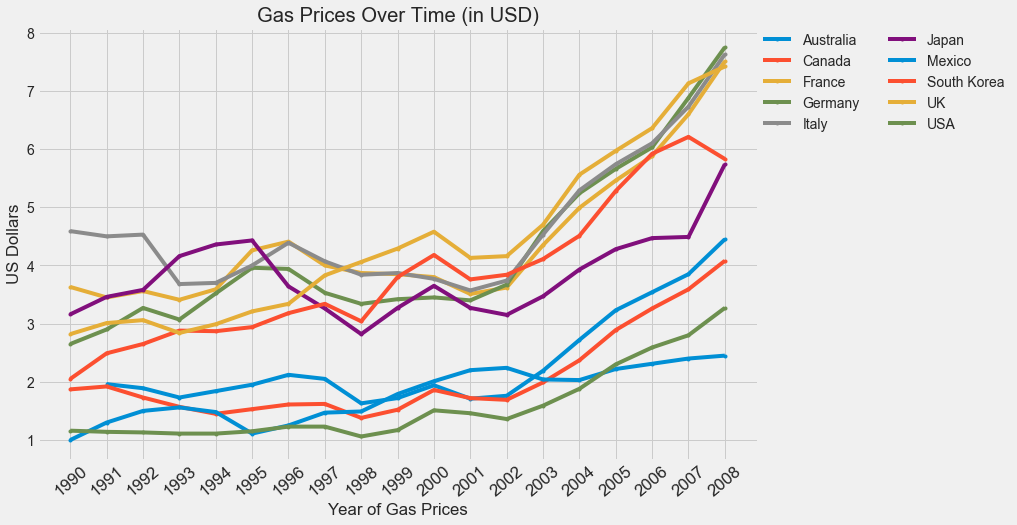

In [8]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

ax.set_title('Gas Prices Over Time (in USD)')
ax.set_xlabel('Year of Gas Prices')
ax.set_ylabel('US Dollars')

for country in gas:
    if country != 'Year':
        ax.plot(gas.Year, gas[country], marker = '.', label = country)
        
ax.set_xticks(gas.Year)
ax.set_xticklabels(gas.Year, rotation = 40, fontsize = 'large')

ax.legend(loc = 'best',  bbox_to_anchor=(1, 1), ncol=2, fancybox=True, shadow=True, 
         borderaxespad=0, frameon=False)
plt.show()

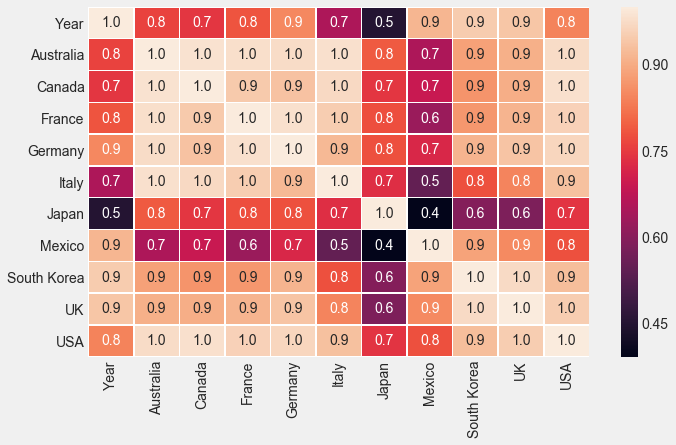

In [36]:
sb.heatmap(gas.corr(), annot=True, linewidths=.5, fmt='.1f')
plt.show()

Another way to plot multiple Specific values

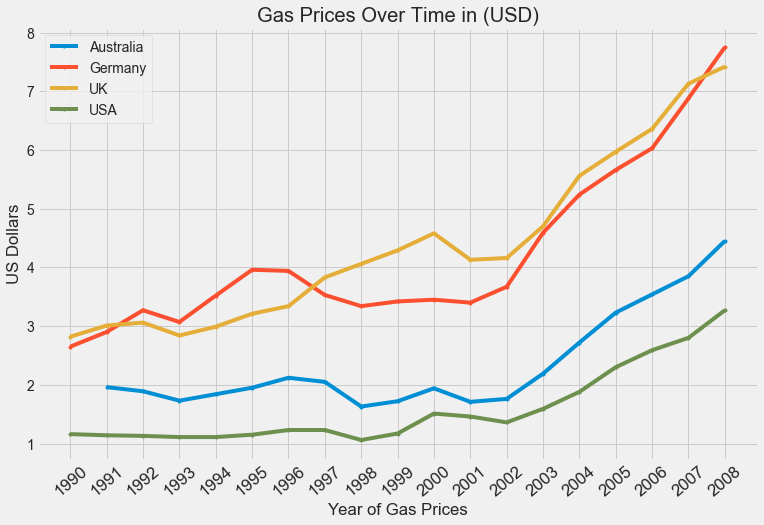

In [15]:
fig = plt.figure()
ax = fig.add_axes([.1, 1., 1, 1])

ax.set_title('Gas Prices Over Time in (USD)')
ax.set_xlabel('Year of Gas Prices')
ax.set_ylabel('US Dollars')

countries_to_look = ['Australia', 'USA', 'UK', 'Germany']
for country in gas:
    if country in countries_to_look:
        ax.plot(gas.Year, gas[country], label = country, marker = '.')
        
ax.set_xticks(gas.Year)
ax.set_xticklabels(gas.Year, rotation = 40, fontsize = 'large')

ax.legend(loc = 'best')
plt.show()

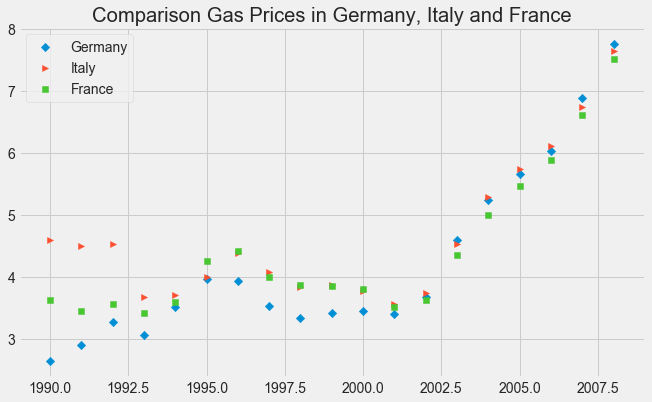

In [19]:

plt.scatter(y = gas.Germany, x = gas.Year, label = 'Germany', marker = 'D')
plt.scatter(y = gas.Italy, x = gas.Year,  label = 'Italy', marker = '>')
plt.scatter(y = gas.France, x = gas.Year, label = 'France', marker = 's', color = '#48c732')

plt.title('Comparison Gas Prices in Germany, Italy and France')
plt.legend()
plt.show()

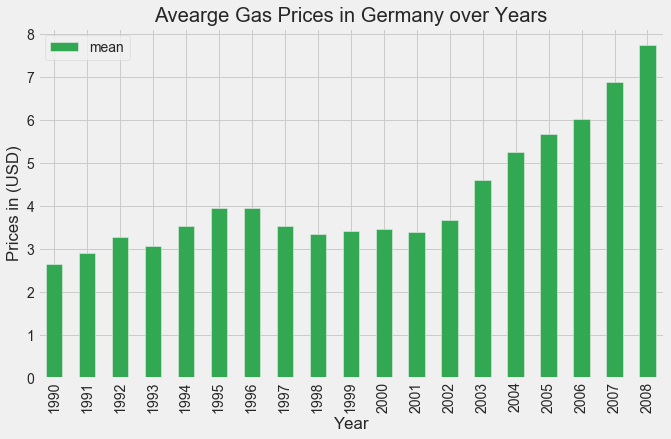

In [27]:
gas.groupby('Year').Germany.agg(['mean']).plot(kind = 'bar', color = '#32a852')

plt.title('Avearge Gas Prices in Germany over Years')
plt.xlabel('Year')
plt.ylabel('Prices in (USD)')
plt.show()